In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [13]:
# Specify the file path for the TSV file
file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_elevated_ecg.tsv'

# Read the TSV file into a DataFrame
data = pd.read_csv(file_path, sep='\t')

# Display the loaded DataFrame
print(data)

  Participant_ID  ECG_Rate_Mean        HRV_MeanNN          HRV_SDNN  \
0           pb05      72.132494  [[834.14473684]]  [[229.19995671]]   
1           pb04      72.132494  [[834.14473684]]  [[229.19995671]]   

        HRV_SDANN1       HRV_SDNNI1      HRV_SDANN2        HRV_SDNNI2  \
0  [[53.32995346]]  [[99.95290746]]  [[59.5730679]]  [[202.35222801]]   
1  [[53.32995346]]  [[99.95290746]]  [[59.5730679]]  [[202.35222801]]   

  HRV_SDANN5 HRV_SDNNI5  ...      HRV_SampEn      HRV_ShanEn     HRV_FuzzyEn  \
0    [[nan]]    [[nan]]  ...  [[0.28784501]]  [[7.19731457]]  [[0.33901018]]   
1    [[nan]]    [[nan]]  ...  [[0.28784501]]  [[7.19731457]]  [[0.33901018]]   

         HRV_MSEn       HRV_CMSEn      HRV_RCMSEn          HRV_CD  \
0  [[0.39726006]]  [[0.63372585]]  [[0.54514332]]  [[0.23179349]]   
1  [[0.39726006]]  [[0.63372585]]  [[0.54514332]]  [[0.23179349]]   

          HRV_HFD         HRV_KFD         HRV_LZC  
0  [[1.78449056]]  [[1.39820876]]  [[0.67656755]]  
1  [[1.784490

In [14]:
# Define a function to extract numeric values from a string in the specified format
def extract_numeric_from_string(cell_value):
    try:
        return float(cell_value[2:-2]) if isinstance(cell_value, object) else cell_value
    except ValueError:
        return cell_value

In [15]:
# Apply the function to all cells except 'Participant_ID' column and numeric columns
non_numeric_columns = ['Participant_ID', 'ECG_Rate_Mean']  # Add other numeric column names as needed
columns_to_apply = data.columns.difference(non_numeric_columns)

data[columns_to_apply] = data[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)

# Display the updated DataFrame
print(data)

  Participant_ID  ECG_Rate_Mean  HRV_MeanNN    HRV_SDNN  HRV_SDANN1  \
0           pb05      72.132494  834.144737  229.199957   53.329953   
1           pb04      72.132494  834.144737  229.199957   53.329953   

   HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  ...  \
0   99.952907   59.573068  202.352228         NaN         NaN  ...   
1   99.952907   59.573068  202.352228         NaN         NaN  ...   

   HRV_SampEn  HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  \
0    0.287845    7.197315      0.33901   0.39726   0.633726    0.545143   
1    0.287845    7.197315      0.33901   0.39726   0.633726    0.545143   

     HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC  
0  0.231793  1.784491  1.398209  0.676568  
1  0.231793  1.784491  1.398209  0.676568  

[2 rows x 93 columns]


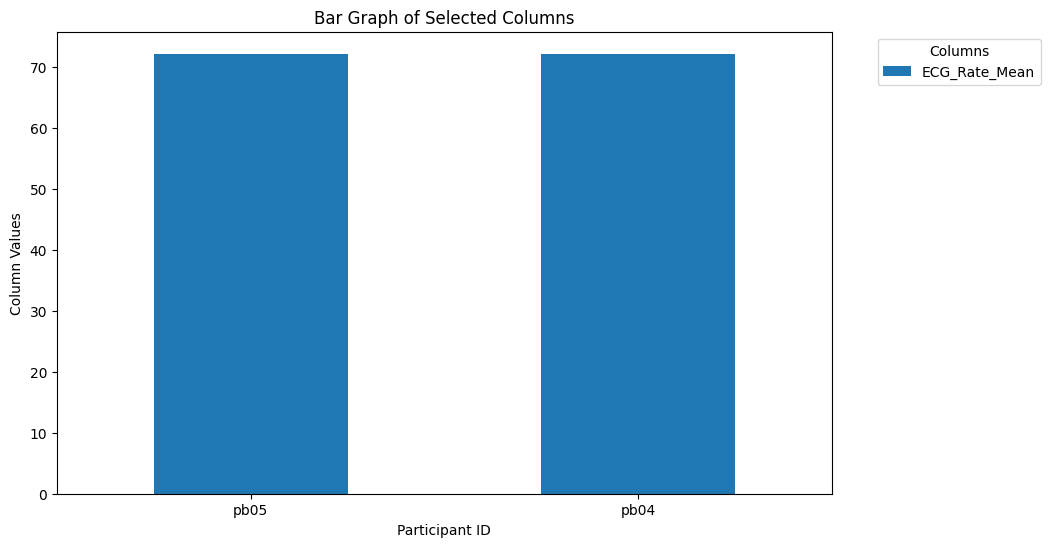

In [16]:
# Specify the variables of interest 
selected_columns = ['ECG_Rate_Mean']  

# Select the specified columns from the DataFrame
selected_data = data[['Participant_ID'] + selected_columns]

# Plot a bar graph
selected_data.set_index('Participant_ID').plot(kind='bar', rot=0, figsize=(10, 6))

# Customize the plot
plt.title('Bar Graph of Selected Columns')
plt.xlabel('Participant ID')
plt.ylabel('Column Values')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

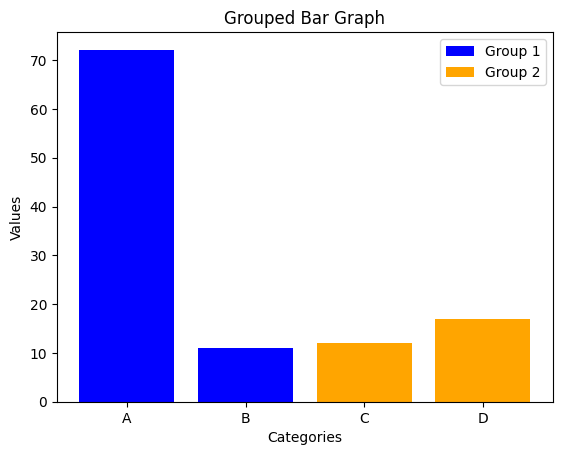

In [20]:
# Sample data
categories = ['A', 'B', 'C', 'D']
values = [np.mean([data.ECG_Rate_Mean]), np.mean([9, 11, 13]), np.mean([10,12,14]), np.mean([15,17,19])]

# Set up positions for the bars
bar_positions = np.arange(len(categories))

# Plot the grouped bars
plt.bar(bar_positions[:2], values[:2], label='Group 1', color='blue')
plt.bar(bar_positions[2:], values[2:], label='Group 2', color='orange')

# Set labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Graph')
plt.xticks(bar_positions, categories)
plt.legend()

# Show the plot
plt.show()

In [19]:
print(selected_columns)

['ECG_Rate_Mean']
